# Comparison of different clustering methods (on binary rainfall) and Regression (for continuous rainfall)

## Clustering (with a binary outcome rainfall)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, MeanShift
from sklearn.metrics import adjusted_rand_score, silhouette_score


In [ ]:
df = pd.read_csv('weather.csv')

In [4]:
df_nodate = df.drop(columns=['date'])
df['date'] = df['date'].str.replace('-', '')

In [5]:
df_nodate

,id,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall,region
0,0,1025.3,4.1,3.2,2.4,2.4,94.3,95,0.0,270,2.6,1.2,90
1,1,1010.7,8.8,5.3,2.4,-2.5,62.3,65,3.5,290,11.5,1.1,90
2,2,1016.3,6.0,1.8,-2.7,-15.3,29.4,20,8.4,290,9.5,0.0,90
3,3,1022.7,5.5,1.0,-2.7,-11.7,40.5,28,5.6,290,3.3,0.0,90
4,4,1020.3,1.7,0.9,-0.1,-1.3,87.0,100,0.0,290,2.7,10.4,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...
774310,774310,999.5,34.3,29.3,25.8,24.8,78.0,55,8.6,270,2.9,0.0,295
774311,774311,999.2,34.2,28.3,25.2,22.9,74.1,26,11.5,250,3.2,0.0,295
774312,774312,999.1,32.6,27.7,24.6,23.7,79.9,24,10.2,250,2.6,0.0,295
774313,774313,998.8,32.7,28.0,24.2,23.4,77.6,31,10.4,270,2.7,0.0,295


In [6]:
df

,id,date,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall,region
0,0,20000101,1025.3,4.1,3.2,2.4,2.4,94.3,95,0.0,270,2.6,1.2,90
1,1,20000102,1010.7,8.8,5.3,2.4,-2.5,62.3,65,3.5,290,11.5,1.1,90
2,2,20000103,1016.3,6.0,1.8,-2.7,-15.3,29.4,20,8.4,290,9.5,0.0,90
3,3,20000104,1022.7,5.5,1.0,-2.7,-11.7,40.5,28,5.6,290,3.3,0.0,90
4,4,20000105,1020.3,1.7,0.9,-0.1,-1.3,87.0,100,0.0,290,2.7,10.4,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
774310,774310,20240808,999.5,34.3,29.3,25.8,24.8,78.0,55,8.6,270,2.9,0.0,295
774311,774311,20240809,999.2,34.2,28.3,25.2,22.9,74.1,26,11.5,250,3.2,0.0,295
774312,774312,20240810,999.1,32.6,27.7,24.6,23.7,79.9,24,10.2,250,2.6,0.0,295
774313,774313,20240811,998.8,32.7,28.0,24.2,23.4,77.6,31,10.4,270,2.7,0.0,295


In [8]:
df_binary = df.copy()
df_binary['rainfall'] = (df_binary['rainfall'] > 0).astype(int)
df_binary
#dataset with rainfall as 0 or 1

,id,date,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall,region
0,0,20000101,1025.3,4.1,3.2,2.4,2.4,94.3,95,0.0,270,2.6,1,90
1,1,20000102,1010.7,8.8,5.3,2.4,-2.5,62.3,65,3.5,290,11.5,1,90
2,2,20000103,1016.3,6.0,1.8,-2.7,-15.3,29.4,20,8.4,290,9.5,0,90
3,3,20000104,1022.7,5.5,1.0,-2.7,-11.7,40.5,28,5.6,290,3.3,0,90
4,4,20000105,1020.3,1.7,0.9,-0.1,-1.3,87.0,100,0.0,290,2.7,1,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
774310,774310,20240808,999.5,34.3,29.3,25.8,24.8,78.0,55,8.6,270,2.9,0,295
774311,774311,20240809,999.2,34.2,28.3,25.2,22.9,74.1,26,11.5,250,3.2,0,295
774312,774312,20240810,999.1,32.6,27.7,24.6,23.7,79.9,24,10.2,250,2.6,0,295
774313,774313,20240811,998.8,32.7,28.0,24.2,23.4,77.6,31,10.4,270,2.7,0,295


With binary outcome

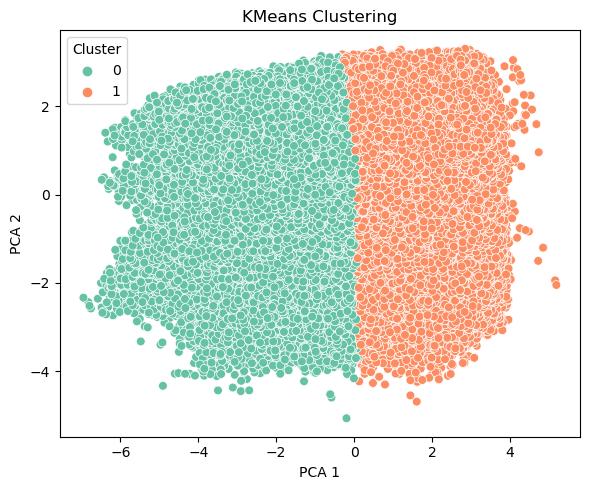

In [ ]:
features = df_binary.select_dtypes(include=[np.number]).drop(columns=['rainfall'], errors='ignore').dropna(axis=1)
X = features.fillna(features.mean()) 

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

clustering_algorithms = {
    "KMeans": KMeans(n_clusters=2, random_state=42),
    "Agglomerative": AgglomerativeClustering(n_clusters=2),
    "DBSCAN": DBSCAN(eps=1.2, min_samples=5),
    "MeanShift": MeanShift()
}

results = {}

for name, algo in clustering_algorithms.items():
    clusters = algo.fit_predict(X_scaled)
    results[name] = clusters

    plt.figure(figsize=(6, 5))
    sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette='Set2', s=40)
    plt.title(f"{name} Clustering")
    plt.xlabel('PCA 1')
    plt.ylabel('PCA 2')
    plt.legend(title='Cluster')
    plt.tight_layout()
    plt.show()

    if 'rainfall' in df.columns:
        score = adjusted_rand_score(df_binary['rainfall'], clusters)
        sil_score = silhouette_score(X_scaled, clusters) if len(set(clusters)) > 1 else -1
        print(f"{name} - Adjusted Rand Index (vs RainTomorrow): {score:.2f}, Silhouette: {sil_score:.2f}")


## Linear regression

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
X = df.drop(columns=['rainfall'])  
y = df['rainfall']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lr = lin_reg.predict(X_test)

rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)
y_pred_rf = rf_reg.predict(X_test)

gb_reg = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_reg.fit(X_train, y_train)
y_pred_gb = gb_reg.predict(X_test)


def evaluate_model(y_true, y_pred, model_name):
    print(f"--- {model_name} ---")
    print(f"MAE : {mean_absolute_error(y_true, y_pred):.3f}")
    print(f"MSE : {mean_squared_error(y_true, y_pred):.3f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_true, y_pred)):.3f}")
    print(f"R2  : {r2_score(y_true, y_pred):.3f}")
    print()

    plt.figure(figsize=(6,4))
    sns.scatterplot(x=y_true, y=y_pred, alpha=0.5)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], '--r')
    plt.xlabel('Real values')
    plt.ylabel('Predictions')
    plt.title(f'{model_name} - Real vs Predicted')
    plt.tight_layout()
    plt.show()

evaluate_model(y_test, y_pred_lr, "Linear Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest")
evaluate_model(y_test, y_pred_gb, "Gradient Boosting")
